# 1. Data Gathering

Load the data using the Pandas library:

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [325]:
input_file_path = "train.csv"
train = pd.read_csv(input_file_path,on_bad_lines='skip')

We start by observing the description of the data:

In [326]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


From the data description, we can observe the range of domain values for each feature, that is how many distinct values are present, what is the average, min or max value, below which values are 50% of the data, etc.
* Interesting to note here is that 75% of the people queried are less than 49 years old, middle-aged, and the min respectively the max ages are 20 and 85, so the survey mainly relates to the adults of the working class.
* Another interesting thing to note is that for everyone the vintage (nr of days the customer has been associated with the company) is less than a year, the max value is 299 days. So every customer of the insurance company is relatively new.
* Regarding the annual premium paid by each customer, the values are relatively close to each other, clustered around an average value of 30564.38, as the mean value shows. The max annual premium paid is 540165, but 75% of the customers pay less than 39400 a year, which is still close to the mean value. Therefore, the prices are relatively close to each other, only a few customers pay more than 39400.

Then, we are curious about the type of each feature and the number of non-null values:

Preview of the data and the data structure:

In [327]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


**Observations:**
- The dataset contains 381109 rows and 12 columns
- There are no Null values
- There are 5 categorical and 4 numerical features
- The dependent feature is the 'Response' column

# Data cleaning
## 1. Remove null (empty) values if any

It seems that there are no features with empty values, each has 381109 non-null values, so no line has to be removed or filled with some default value.

In [254]:
# Another way for checking for missing values
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## 2. Remove unneccesary features

We clean the data set by removing the unnecessary features such as the **id** of the clients, which doesn't influence in any way the response, it is only used to differentiate between specific customers.

In [255]:
train = train.drop('id', axis=1)

# 2. Data Visualization

In order to understand better the given data, we try to visualize the relationship between different features and how they affect the final response of the customer, by generating plots and graphs.

First, we study the features independently, then by comparing it to other features.

## Categorical features

For the features which contain categories of values, we generate plots to visualize the partition of the data into distict categories. 
The category features are the following:
* Driving_License = {0, 1} (* show if the customer has a driving license *)
* Gender = {Male, Female}
* Vehicle_Age = {<1 year, 1-2 years, > 2 years}
* Vehicle_Damage = {No, Yes} (* shows whether or not the customer's car has been damaged before *)
* Previously_Insured = {0, 1} (* shows if the customer already had a car insurance before *)

* **Driving license**

First, we analyze the response of the customers relative to whether or not they own a driving license:

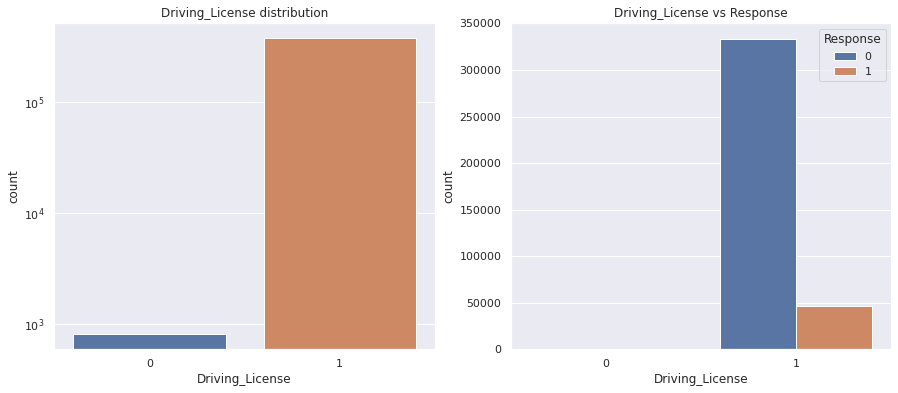

Nr of customers having a driving license:  380297
   vs Nr of customers having NO driving license:  812
Nr of positive responses customers having a driving license:  46669
Ratio of customers with a driving license responding positively: 0.1227 (12.27%) 


In [256]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.set_title('Driving_License distribution')
g1 = sns.countplot(x=train.Driving_License, ax=ax1)
g1.set(yscale = "log")
ax2.set_title('Driving_License vs Response')
sns.countplot(x = 'Driving_License', hue = 'Response', data = train,ax=ax2)
plt.show()

nr_drivers = len(train[train.Driving_License == 1])
nr_non_drivers = len(train[train.Driving_License == 0])
nr_positive_responses_drivers = len(train[(train.Driving_License == 1) & (train.Response == 1)])
ratio_of_positive_responses_drivers = nr_positive_responses_drivers/nr_drivers
print("Nr of customers having a driving license: " , nr_drivers)
print("   vs Nr of customers having NO driving license: " , nr_non_drivers)
print("Nr of positive responses customers having a driving license: " , nr_positive_responses_drivers)
print("Ratio of customers with a driving license responding positively: " + str(round(ratio_of_positive_responses_drivers,4)) + " (" + str(round(ratio_of_positive_responses_drivers * 100,2)) + "%) ")

From the first plot, we can see that most of the customers have a driving license, which is as we would expect.

What is more surprising, is the relatively small ratio of customers having a driving license, who responded positively to the possibilty of a car insurance, more precisely less than 13%. This would imply that having a driving license has little influence on the choice of the customer to pay for a car insurance.

* **Gender**

Next, we are curious to find out how the gender would affect the response of the customers:

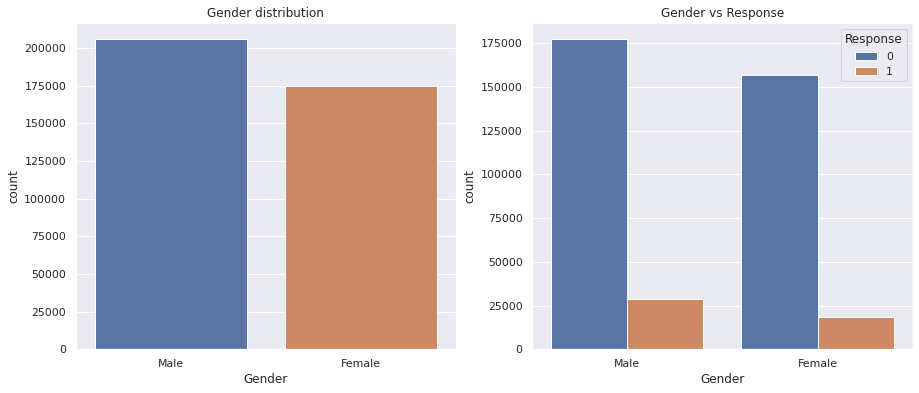

Nr of positive responses from male customers:  28525
Ratio of males responding positively: 0.1384 (13.84%) 
--------------------------------------------
Nr of positive responses from female customers:  18185
Ratio of females responding positively: 0.1039 (10.39%) 


In [257]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.set_title('Gender distribution')
sns.countplot(x=train.Gender, ax=ax1)
ax2.set_title('Gender vs Response')
sns.countplot(x = 'Gender', hue = 'Response', data = train,ax=ax2)
plt.show()

nr_male_customers = len(train[train.Gender == 'Male'])
nr_positive_responses_male = len(train[(train.Gender == 'Male') & (train.Response == 1)])
ratio_of_positive_responses_male = nr_positive_responses_male/nr_male_customers
print("Nr of positive responses from male customers: " , nr_positive_responses_male)
print("Ratio of males responding positively: " + str(round(ratio_of_positive_responses_male,4)) + " (" + str(round(ratio_of_positive_responses_male * 100,2)) + "%) ")
print("--------------------------------------------")

nr_female_customers = len(train[train.Gender == 'Female'])
nr_positive_responses_female = len(train[(train.Gender == 'Female') & (train.Response == 1)])
ratio_of_positive_responses_female = nr_positive_responses_female/nr_female_customers
print("Nr of positive responses from female customers: " , nr_positive_responses_female)
print("Ratio of females responding positively: " + str(round(ratio_of_positive_responses_female,4)) + " (" + str(round(ratio_of_positive_responses_female * 100,2)) + "%) ")

As we can see, among the customers there is a fairly equal number of male and female, so the dataset is balanced from the point of view of the gender.

Although for both genders, the number of responses is predomninantly negative, the Response of the customers related to the gender shows that the ratio of males responding positively is greater than the ratio of women. Therefore, it can be said that men are more interested in car insurance than women are.

* **Age of the vehicle**

Before analyzing the data related to the age of the vehicles, our initial intuition would be that as the age of the car increases, the interest of the customers for a car insurance also rises. This is due to the fact that older cars need more maintainance than newer models, for example, some parts get worn out or break down and need some replacement.

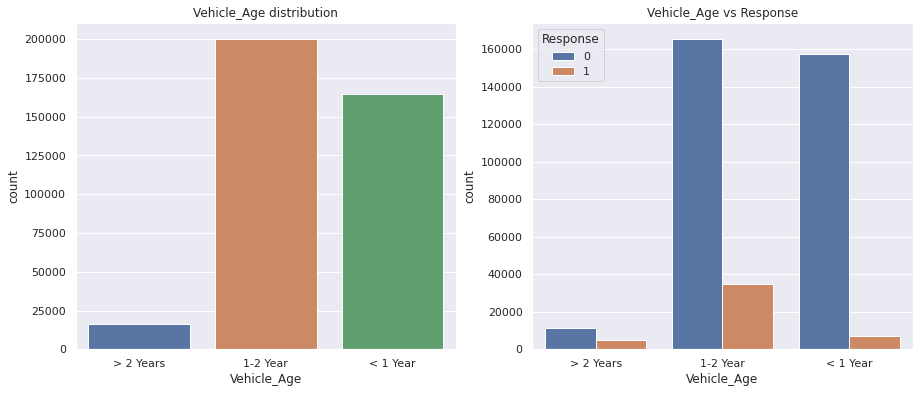

Nr of customers with vehicles of age < 1 Year:  164786
Nr of positive responses from customers with vehicles of age < 1 Year:  7202
Ratio of customers with cars < 1 Year of age responding positively: 0.0437 (4.37%) 
----------------------------------------------------------------------------------------
Nr of customers with vehicles of age 1-2 Year:  200316
Nr of positive responses from customers with vehicles of age 1-2 Year:  34806
Ratio of customers with cars 1-2 Year of age responding positively: 0.1738 (17.38%) 
----------------------------------------------------------------------------------------
Nr of customers with vehicles of age > 2 Years:  16007
Nr of positive responses from customers with vehicles of age > 2 Year:  4702
Ratio of customers with cars > 2 Years of age responding positively: 0.2937 (29.37%) 
----------------------------------------------------------------------------------------


In [258]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.set_title('Vehicle_Age distribution')
sns.countplot(x=train.Vehicle_Age, ax=ax1)
ax2.set_title('Vehicle_Age vs Response')
sns.countplot(x = 'Vehicle_Age', hue = 'Response', data = train,ax=ax2)
plt.show()

nr_new_vehicles = len(train[train.Vehicle_Age == '< 1 Year'])
nr_positive_responses_new_vehicles = len(train[(train.Vehicle_Age == '< 1 Year') & (train.Response == 1)])
ratio_of_positive_responses_new_vehicles = nr_positive_responses_new_vehicles/nr_new_vehicles

print("Nr of customers with vehicles of age < 1 Year: ", nr_new_vehicles)
print("Nr of positive responses from customers with vehicles of age < 1 Year: " , nr_positive_responses_new_vehicles)
print("Ratio of customers with cars < 1 Year of age responding positively: " + str(round(ratio_of_positive_responses_new_vehicles,4))  + " (" + str(round(ratio_of_positive_responses_new_vehicles * 100,2)) + "%) ")
print("----------------------------------------------------------------------------------------")

nr_young_vehicles = len(train[train.Vehicle_Age == '1-2 Year'])
nr_positive_responses_nr_young_vehicles = len(train[(train.Vehicle_Age == '1-2 Year') & (train.Response == 1)])
ratio_of_positive_responses_young_vehicles = nr_positive_responses_nr_young_vehicles/nr_young_vehicles
print("Nr of customers with vehicles of age 1-2 Year: ", nr_young_vehicles)
print("Nr of positive responses from customers with vehicles of age 1-2 Year: " , nr_positive_responses_nr_young_vehicles)
print("Ratio of customers with cars 1-2 Year of age responding positively: " + str(round(ratio_of_positive_responses_young_vehicles,4)) + " (" + str(round(ratio_of_positive_responses_young_vehicles * 100,2)) + "%) ")
print("----------------------------------------------------------------------------------------")

nr_old_vehicles = len(train[train.Vehicle_Age == '> 2 Years'])
nr_positive_responses_old_vehicles = len(train[(train.Vehicle_Age == '> 2 Years') & (train.Response == 1)])
print("Nr of customers with vehicles of age > 2 Years: ", nr_old_vehicles)
print("Nr of positive responses from customers with vehicles of age > 2 Year: " , nr_positive_responses_old_vehicles)
ratio_positive_responses_old_vehicles = nr_positive_responses_old_vehicles/nr_old_vehicles
print("Ratio of customers with cars > 2 Years of age responding positively: " + str(round(ratio_positive_responses_old_vehicles,4)) + " (" + str(round(ratio_positive_responses_old_vehicles * 100,2)) + "%) ")
print("----------------------------------------------------------------------------------------")


Most of the customers had relatively new cars with ages less than 1 year, and among those with such new cars, only a very small ratio, less than 5%, was interested in car insurance. Which is understandable as new cars are not supposed to break down very easily or need their parts replaced, however they are just as much at risk of being damaged in an accident or by some natural hazard, such as hail.

As the age of the car increases, the ratio of customers opting for a car insurance also increases, as it is shown in the case of the cars with age greater than 2 years. Although, the nr of older cars (age > 2 Years) is more than 10% smaller than the nr of new cars (age < 1 Year), the ratio of customers interested in a car insurance is almost 30%.

This clearly indicates that the customers having older cars are more interested in having an insurance for their cars.

* **Vehicle damage**

We would expect that people who once had their cars damaged would be more interested in a car insurance, in case the same would happen to them in the future.

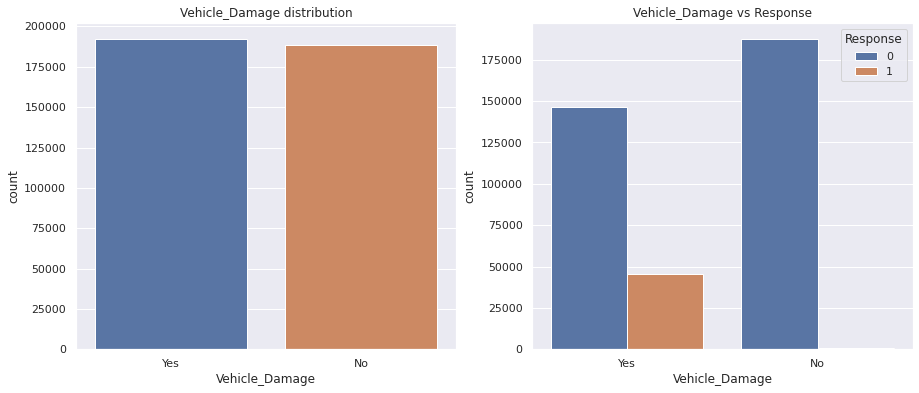

Nr of customers having their vehicles previously damaged:  192413
   vs Nr of customers having no previous damage to their vehicles:  188696
Nr of POSITIVE responses of customers having their vehicles previously damaged:  45728
   vs Nr of NEGATIVE responses of customers having their vehicles previously damaged:  146685
Ratio of customers, having their vehicles previously damaged, who responded positively: 0.2377 (23.77%) 


In [260]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.set_title('Vehicle_Damage distribution')
sns.countplot(x=train.Vehicle_Damage, ax=ax1)
ax2.set_title('Vehicle_Damage vs Response')
sns.countplot(x = 'Vehicle_Damage', hue = 'Response', data = train,ax=ax2)
plt.show()

nr_damaged_vehicles = len(train[train.Vehicle_Damage == 'Yes'])
nr_not_damaged_vehicles = len(train[train.Vehicle_Damage == 'No'])
nr_positive_responses_damaged_vehicles = len(train[(train.Vehicle_Damage == 'Yes') & (train.Response == 1)])
nr_negative_responses_damaged_vehicles = len(train[(train.Vehicle_Damage == 'Yes') & (train.Response == 0)])
ratio_of_positive_responses_damaged_vehicles = nr_positive_responses_damaged_vehicles/nr_damaged_vehicles

print("Nr of customers having their vehicles previously damaged: ", nr_damaged_vehicles)
print("   vs Nr of customers having no previous damage to their vehicles: ", nr_not_damaged_vehicles)
print("Nr of POSITIVE responses of customers having their vehicles previously damaged: ", nr_positive_responses_damaged_vehicles)
print("   vs Nr of NEGATIVE responses of customers having their vehicles previously damaged: ", nr_negative_responses_damaged_vehicles)
print("Ratio of customers, having their vehicles previously damaged, who responded positively: "+ str(round(ratio_of_positive_responses_damaged_vehicles,4)) + " ("+ str(round(ratio_of_positive_responses_damaged_vehicles * 100,2)) + "%) ")

As the figures show, among the customers, around half of them had their cars previously damaged.

From the ones who already had some damage to their cars in the past, more than 23% have responded affirmatively to the option of having a car insurance, which shows:
* Firstly, that customers who already know the expenses of repairing a damaged car, are appreciating more the possibility of an insurance on their vehicles, to prevent future costs.
* Secondly, that previous damage to the vehicle has more influence on the response of the customers than having a driving license.

Another remark, is that on the second plot it seems that customers who had no previous damage to their cars all responded negatively to the offer of a car insurance, however after a closer look to the numbers, we can see that there are still a few people who would like to have an insurance on their cars even though they haven't suffered damage before.

In [104]:
nr_positive_responses_not_damaged_vehicles = len(train[(train.Vehicle_Damage == 'No') & (train.Response == 1)])
nr_negative_responses_not_damaged_vehicles = len(train[(train.Vehicle_Damage == 'No') & (train.Response == 0)])
print("Nr of POSITIVE responses of customers having no previous damage to their vehicles: ", nr_positive_responses_not_damaged_vehicles)
print("Nr of NEGATIVE responses of customers having no previous damage to their vehicles: ", nr_negative_responses_not_damaged_vehicles)

Nr of POSITIVE responses of customers having no previous damage to their vehicles:  982
Nr of NEGATIVE responses of customers having no previous damage to their vehicles:  187714


This means that the scale of the nr of customers with previous vehicle damage and the nr of customers with positive response doesn't match. This can be corrected however, by using a logarithmic scale for the nr of responses.

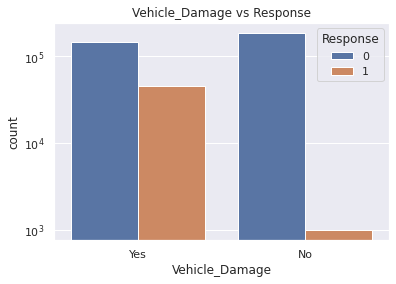

In [105]:
plt.title('Vehicle_Damage vs Response')
g = sns.countplot(x = 'Vehicle_Damage', hue = 'Response', data = train)
g.set(yscale="log")
plt.show()

* **Previous insurance**

We would expect that, customers having had a car insurance previously would like to extend their insurance contract if they have a very old car or if they have had some damage to their vehicles, in which cases an insurance would seem very advantageous to them. 

Therefore, aside from analyizing the data of having a previous insurance relative to the positive response of the customers, it would also seem interesting to compare it against the age of the vehicle and the previous damage, to see if these combined would increase the number of positive responses or not.

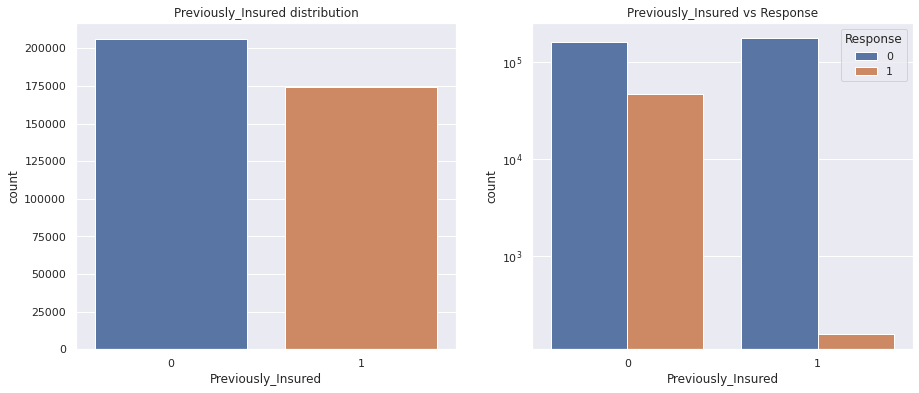

Nr of customers having previously insured:  174628
   vs Nr of customers having NO previous insurance:  206481
Nr of positive responses from customers having previously insured:  158
   vs Nr of positive responses from customers having NO previous insurance:  46552
Ratio of customers having previously insured and responding positively: 0.0009 (0.09%) 


In [261]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.set_title('Previously_Insured distribution')
sns.countplot(x=train.Previously_Insured, ax=ax1)
ax2.set_title('Previously_Insured vs Response')
g = sns.countplot(x = 'Previously_Insured', hue = 'Response', data = train,ax=ax2)
g.set(yscale="log")
plt.show()

nr_prev_insured = len(train[train.Previously_Insured == 1])
nr_not_prev_insured = len(train[train.Previously_Insured == 0])
nr_positive_responses_prev_insured = len(train[(train.Previously_Insured == 1) & (train.Response == 1)])
nr_positive_responses_not_prev_insured = len(train[(train.Previously_Insured == 0) & (train.Response == 1)])
ratio_of_positive_responses_prev_insured = nr_positive_responses_prev_insured/nr_prev_insured

print("Nr of customers having previously insured: " , nr_prev_insured)
print("   vs Nr of customers having NO previous insurance: ", nr_not_prev_insured)
print("Nr of positive responses from customers having previously insured: " , nr_positive_responses_prev_insured)
print("   vs Nr of positive responses from customers having NO previous insurance: " , nr_positive_responses_not_prev_insured)
print("Ratio of customers having previously insured and responding positively: " + str(round(ratio_of_positive_responses_prev_insured,4)) + " (" + str(round(ratio_of_positive_responses_prev_insured * 100,2)) + "%) ")

As we can see, around half of the customers have had a car insurance before, but only 9 out of 10000 of them would like to have an insurance on their vehicles in the future as well. On the other side, from the customers who did not have a car insurance previously, half of them responded positively.

This means, that having had a car insurance previously doesn't increase the number of positive responses directly, however it could have a larger impact on the Responses of the customers if analyzed in combination with the Vehicle_Damage or the Vehicle_Age features.

Previously_Insured vs Response in relation with Vehicle_Damage


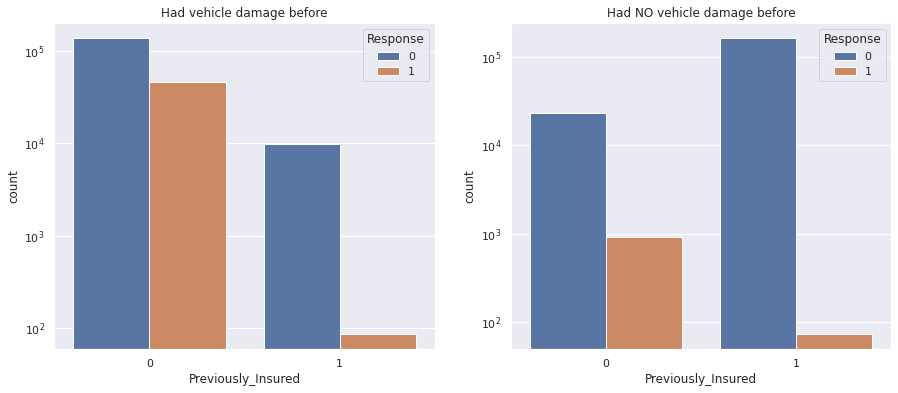

In [107]:
vehicle_damage = train[train.Vehicle_Damage == 'Yes']
no_vehicle_damage = train[train.Vehicle_Damage == 'No']

print("Previously_Insured vs Response in relation with Vehicle_Damage")

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.set_title('Had vehicle damage before')
g1 = sns.countplot(x = 'Previously_Insured', hue = 'Response', data=vehicle_damage, ax = ax1)
g1.set(yscale="log")
ax2.set_title('Had NO vehicle damage before')
g2 = sns.countplot(x = 'Previously_Insured', hue = 'Response', data=no_vehicle_damage, ax = ax2)
g2.set(yscale="log")
plt.show()

From the above plots, we can see that those who had NOT been previously insured but had suffered damage to their vehicles are more interested in a car insurance, than those who also have NOT been previously insured but had no damage to their cars yet, which is a reasonable outcome.

Next, we analyze the Previously_Insured w.r.t. Vehicle_Age:

Previously_Insured vs Response in relation with Vehicle_Age


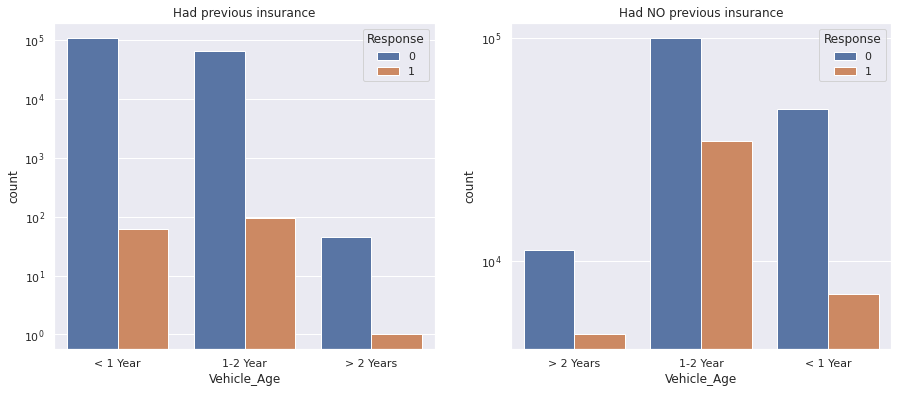

In [109]:
prev_insurance = train[train.Previously_Insured == 1]
no_prev_insurance = train[train.Previously_Insured == 0]

print("Previously_Insured vs Response in relation with Vehicle_Age")

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.set_title('Had previous insurance')
g1 = sns.countplot(x = 'Vehicle_Age', hue = 'Response', data=prev_insurance, ax = ax1)
g1.set(yscale="log")
ax2.set_title('Had NO previous insurance')
g2 = sns.countplot(x = 'Vehicle_Age', hue = 'Response', data=no_prev_insurance, ax = ax2)
g2.set(yscale="log")
plt.show()

From the plots, we can conclude that among the customers with vehicles of ages between 1-2 years, those who had no previous insurance were more interested in having an insurance in the future, than those who already owned one. 

Interesting to note that the customers owning newer cars, of less than 1 year, or older ones, of more than 2 years, were much less likely to have an insurance in the future, regardless of whether they had one before or not.

### Data cleaning (pre-processing) for categorical features
As we have seen, some of these categorical features, mainly those which represent more than 2 (binary) categories, contain values in form of a text, which have to be encoded using numerical labels in order to use them later for our model.

Using a LabelEncoder we can assign a unique numerical code for each distinct category inside a feature, and the final form of the data becomes:
* for binary categories 0 represents if the property is present, 1 if it is missing, for ex. having or not having a Driving license/Previous insurance/Damage to the vehicle. In case of Gender, 1 means 'Male', while 0 means 'Female'.
* as for the categories with multiple values, in this case only the Vehicle_Age, 0 stands for '1-2 Years', 1 means having '< 1 Years' and 2 for '> 2 Years.

In [328]:
from sklearn.preprocessing import LabelEncoder

# assign labels for each category
le = LabelEncoder()
train = train.apply(le.fit_transform)
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,24,1,28,0,2,1,23593,24,207,1
1,1,1,56,1,3,0,0,0,16675,24,173,0
2,2,1,27,1,28,0,2,1,21433,24,17,1
3,3,1,1,1,11,1,1,0,11758,145,193,0
4,4,0,9,1,41,1,1,0,10635,145,29,0


## Numerical features

Next, for the features containing numerical values we generate distribution plots to analyze the influence of these values on the final response of the customers.

Numerical feautures are:
* Age: between 20 to 85 years
* Annual_Premium: how much the customer has to pay for insurance in a year, ranges between 2630.0	to max 540165.0
* Vintage: how long the customer has been associated with the insurance company, ranges between 10 to 299 days
* Policy_Sales_Channel: 163 distinct channels, encoded anonyomously, which represent the communication channel on which the customer can be reached, for ex. phone, mail, webpage announcement, etc.
* Region_Code: between 0 to 52, which represent the encoding of the region where the customer lives

* **Age**

First, we look at how the age influences the choice of the customer of opting for a car insurance:

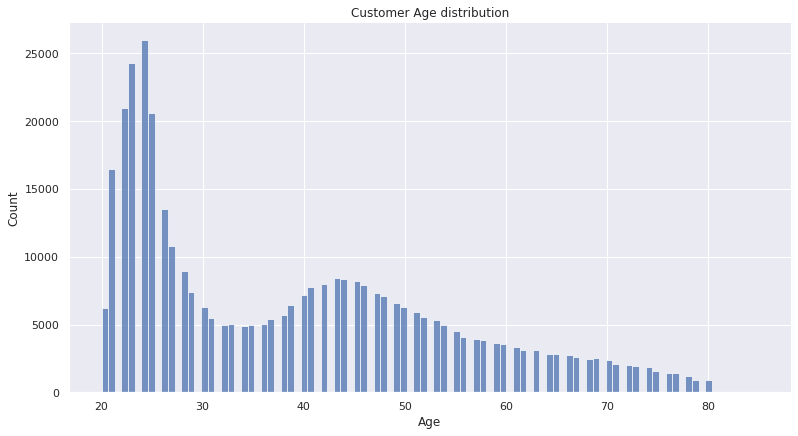

In [267]:
sns.displot(x = 'Age', data = train, height = 6, aspect=15/8)
plt.title('Customer Age distribution')
plt.show()

As we can see the ages are quite varying, but there are some clusters around specific ranges, therefore we can distinguish 3 age groups:
* young: 20-40
* middle-aged: 40-60
* old: 60-80

As we can see from the distribution plot, most of the customers are young, with ages between 20-30 years, or middle aged, between 40-50 years, representing the working class.

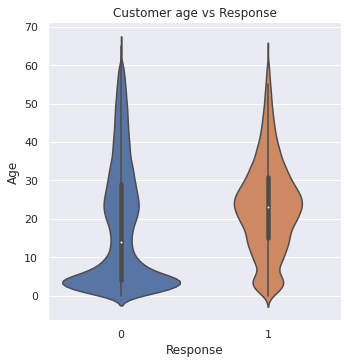

In [329]:
sns.catplot(x="Response", y='Age', data=train, kind="violin")
plt.title("Customer age vs Response")
plt.show()

In [268]:
 # categorize the 'Age' feature
train['Age_Group'] = train['Age'].apply(lambda x:'Young' if x >= 20 and x<40 else 'MiddleAged' if x>=40 and x<60 else 'Old')

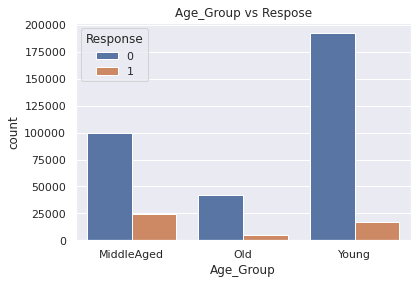

In [276]:
sns.countplot(x = 'Age_Group', data = train, hue='Response')
plt.title("Age_Group vs Respose")
plt.show()

Analyzing the Responses relative to the ages of the customers we find out that *Younger* customers with ages between 20-40 years, were much less interested in having a car insurance, than *Middle-Aged* customers with ages between 40-50. And *Older* customers above the age of 60, were also less interested in a car insurance.

This tells us, that age indeed, represents an important factor in determining whether or not a customer would be interested in a car insurance.

* **Annual premium**

The annual premium paid for insurance should be measured against the income of a person, but in this case we do not have data about how much the customers earn. 

As an initial guess, we would assume that those who already pay very much for an insurance would be less interested in having a car insurance, than those who pay a reasonable amount.

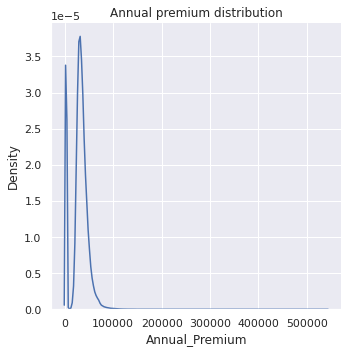

In [240]:
sns.displot(train.Annual_Premium, kind="kde", common_norm=False)
plt.title('Annual premium distribution')
plt.show()

From the above plot, we can see that there are some values which lie very much outside the common range of values, which distort the plot as well, the figure appearing strongly right-skewed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


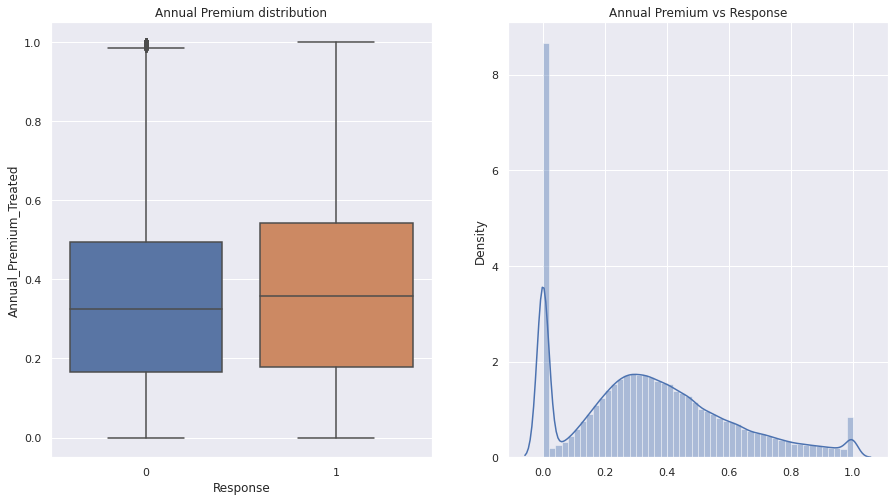

In [331]:
UpperLimit = 2.5 * train['Annual_Premium'].quantile(0.75) - 1.5 * train['Annual_Premium'].quantile(0.25)
# remove oulier values based on the previously computed UpperLimit
train['Annual_Premium_Treated'] = np.where(train['Annual_Premium']>UpperLimit, UpperLimit, train['Annual_Premium'])

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# normalize the data to fit in the scale of [0,1] for better visualization
train['Annual_Premium_Treated'] = scaler.fit_transform(train['Annual_Premium_Treated'].values.reshape(-1,1))

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,8))
ax1.set_title("Annual Premium distribution")
sns.distplot(ax = ax2, x = train['Annual_Premium_Treated'])
ax2.set_title("Annual Premium vs Response")
sns.boxplot(ax = ax1, y = 'Annual_Premium_Treated',x = 'Response', data = train)

After removing the outlier values and rescaling the range of values, we observe form the plots that most of the people pay around the same amount of Annual Premium, and the responses were also balanced for those who pay a fairly similar amount for Annual Premium, therefore, it doesn't influence the customer's response as much as one would expect.

* **Vintage**

As it shows in the plot below, the Vintage value is equally dispersed among the customers, meaning that there are customers who joined the company only recently, or those who have been associated with the insurance company from longer ago. No customer has been associated with the company for more than a year, which means all of them are relatively new customers.

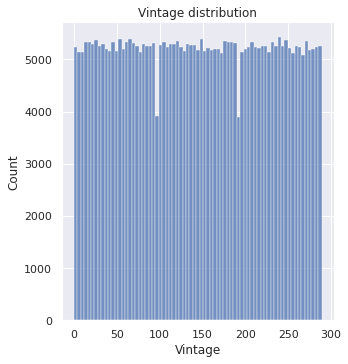

In [332]:
sns.displot(x = train['Vintage'])
plt.title("Vintage distribution")
plt.show()

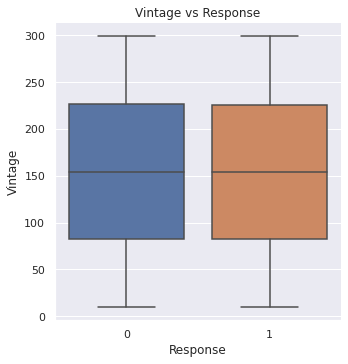

In [287]:
sns.catplot(y = 'Vintage',x = 'Response', data = train, kind="box")
plt.title("Vintage vs Response")
plt.show()

Analyzing the response of the customers relative to their vintage, we can see that the vintage value is between 100-230 for the majority of them, and their responses are divided equally. Therefore, the Vintage is not so relevant for the response feature.

* **Region_Code**

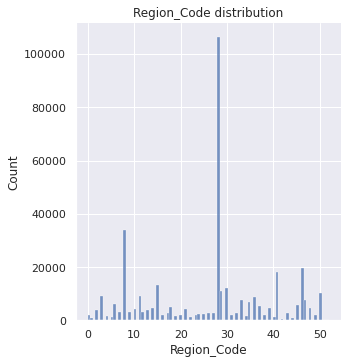

In [300]:
sns.displot(x = train['Region_Code'])
plt.title("Region_Code distribution")
plt.show()

From the above plot, we can see that there appear to be region codes from of every value between the rage 0-52, but there are also 3 higher peaks, between below 40000, above 100000 and around 20000.

Therefore, we can distinguish 3 categories for the region codes:
* Region_A: representing those regions from where more than 100000 customers come
* Region_B: those regions belong here which have between 10000 and 35000 customers
* Region_C: regions with less than 10000 customers.

In [333]:
# Categorizing Region Code feature
x = train['Region_Code'].value_counts().apply(lambda x: 'Region_A' if x>100000 else 'Region_B' if x>11000 and x<340000 else 'Region_C')
category_map = dict(zip(x.keys(),x.values))
train['Region_Code_Group'] = train['Region_Code'].map(category_map) 

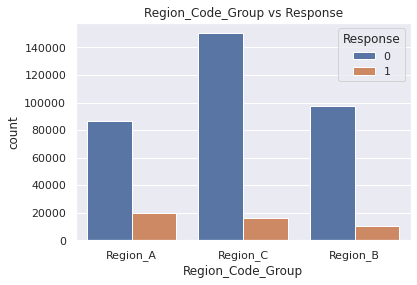

In [311]:
sns.countplot(x = 'Region_Code_Group', data = train, hue='Response')
plt.title("Region_Code_Group vs Response")
plt.show()

After projecting the response of the customers on the 3 new regions, we can see that most of the positive responses came from regions A and C, and most of the negative responses came also from region C.

* **Policy Sales Channel**


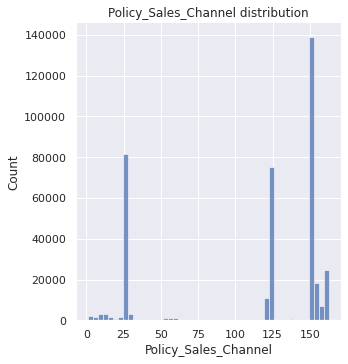

In [312]:
sns.displot(x = train['Policy_Sales_Channel'])
plt.title("Policy_Sales_Channel distribution")
plt.show()

Similarly, as in case of the Region_Code feature, we can observe that the Ploicy_Sales_Channel codes also take all the values in the range 0-160. The 3 peaks indicate that the most customers can be reached on channels encoded with 25, 125 150 and 160 labels.

In order to better visualize the plots, we differentiate again 3 categories, as indicated by the 4 peak values and distribute the policy channels into these categories:
* Channel_A : those channels which allow reaching more than 100000 customers. These are the most effective communication channels.
* Channel_B: those channels on which the company can reach around 75000-100000 customers
* Channel_C: which can reach out to between 10000-75000 customers
* Channel_D: which can reach out less than 10000 customers. These are the less effective communication channels.

In [334]:
x = train['Policy_Sales_Channel'].value_counts().apply(lambda x: 'Channel_A' if x>100000 else 'Channel_B' if 75000<x<100000 else 'Channel_C' if 10000<x<=75000 else 'Channel_D') 
category_map = dict(zip(x.keys(),x.values))
train['Policy_Sales_Channel_Group'] = train['Policy_Sales_Channel'].map(category_map) 

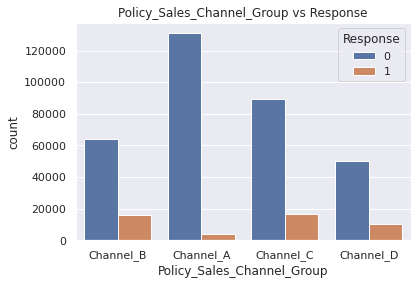

In [314]:
sns.countplot(x = 'Policy_Sales_Channel_Group', data = train, hue='Response')
plt.title("Policy_Sales_Channel_Group vs Response")
plt.show()

From the plot it show that Channel_B and Channel_C are the most effective ways of reaching the customers in order to inform them about the possibility of a car insurance, as they have the most positive responses. Channel_A seems to be the worst choice as it has few positive responses and it also had the most negative responses.

## Analyzing combinations of features

In order to determine which features have a greater influence on the Response, it is not enough to observe them individually, as they could influence one another in some way, therefore we are curious to find a relationship/correlation between some of the features and to isolate features that are completely independent of the others and may have no relevance to the result.

In order to have a starting idea of which combination of features are worth considering, we look at the generated heat-map and try to identify pairs of features which are more correlated (look for squares of darker colours).

In [335]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_Treated,Region_Code_Group,Policy_Sales_Channel_Group
0,0,1,24,1,28,0,2,1,23593,24,207,1,0.523940,Region_A,Channel_B
1,1,1,56,1,3,0,0,0,16675,24,173,0,0.370309,Region_C,Channel_B
2,2,1,27,1,28,0,2,1,21433,24,17,1,0.475972,Region_A,Channel_B
3,3,1,1,1,11,1,1,0,11758,145,193,0,0.261115,Region_C,Channel_A
4,4,0,9,1,41,1,1,0,10635,145,29,0,0.236176,Region_B,Channel_A


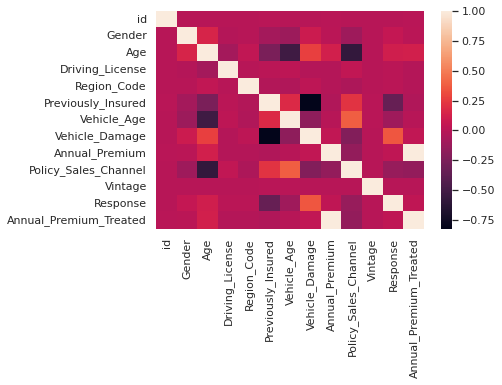

In [336]:
# generate a heatmap
sns.heatmap(train.corr())

As the heat-map shows the following pair of features have a stronger correlance:
1. Previously_Insured and Vehicle_Damage
2. Age and Policy_Sales_Channel
3. Age and Vehicle_Age
4. Age and Previously_Insured
5. Vehicle_Age and Vehicle_Damage
6. Vehicle_Damage and Policy_Sales_Channel
7. Age and Driving_License
8. Policy_Sales_Channel and Annual_Premium

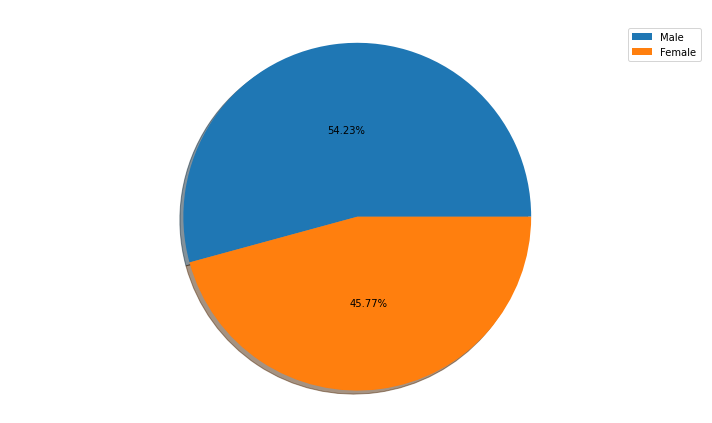

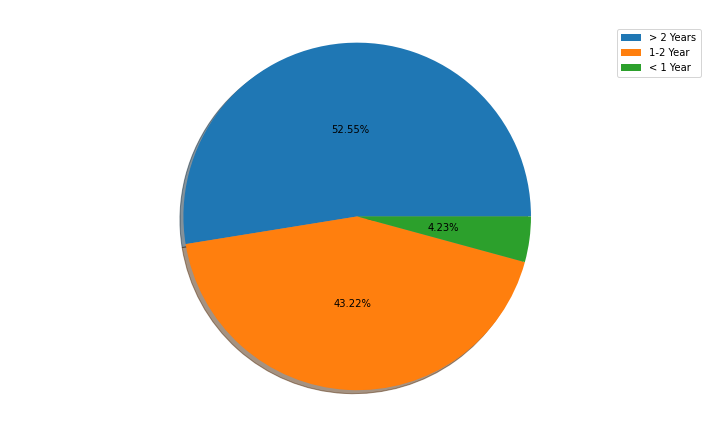

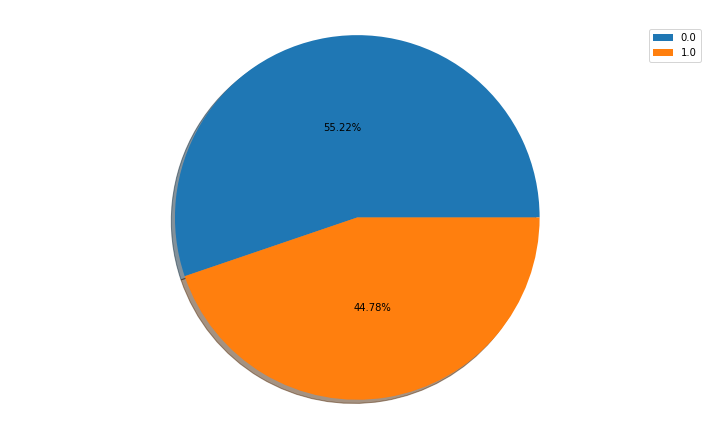

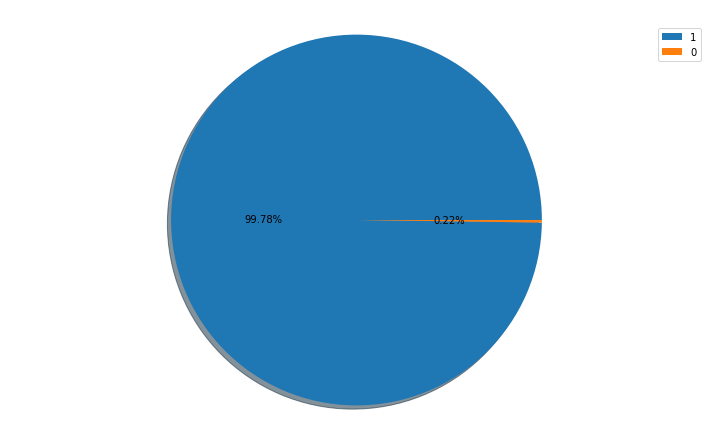

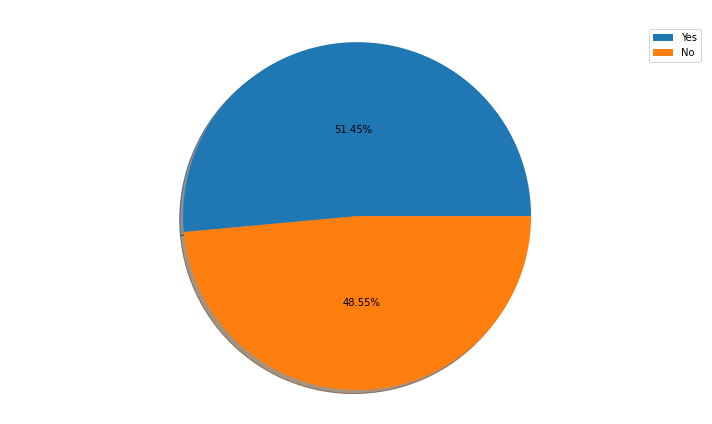

In [ ]:
# create pie charts for better visualization
for cat_feature in categories_feature:
    values = train[cat_feature].value_counts()
    labels = train[cat_feature].unique()
    pie, ax = plt.subplots(figsize=[10, 6])

    patches, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.2f%%', shadow=True, pctdistance=.5)

    plt.legend(patches, labels , loc="best")
    plt.title(cat_feature, color='white', fontsize=14)
    plt.setp(texts, color='white', fontsize=20)
    plt.setp(autotexts, size=10, color='black')
    autotexts[1].set_color('black')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

In [ ]:
# the number of unique values for each feature containing numerical values for the labels
for nf in numerical_features:
  print(nf,':', len(train[nf].unique()))

Age : 65
Annual_Premium : 12554
Vintage : 290
Policy_Sales_Channel : 108
Region_Code : 53


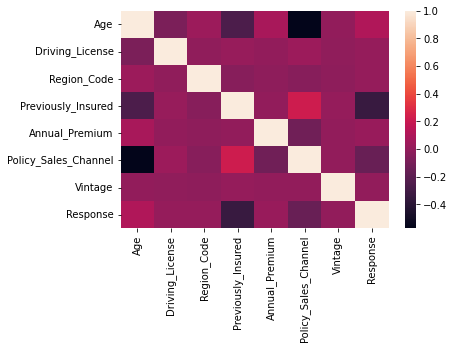

In [ ]:
# generate a heatmap
sb.heatmap(train.corr())

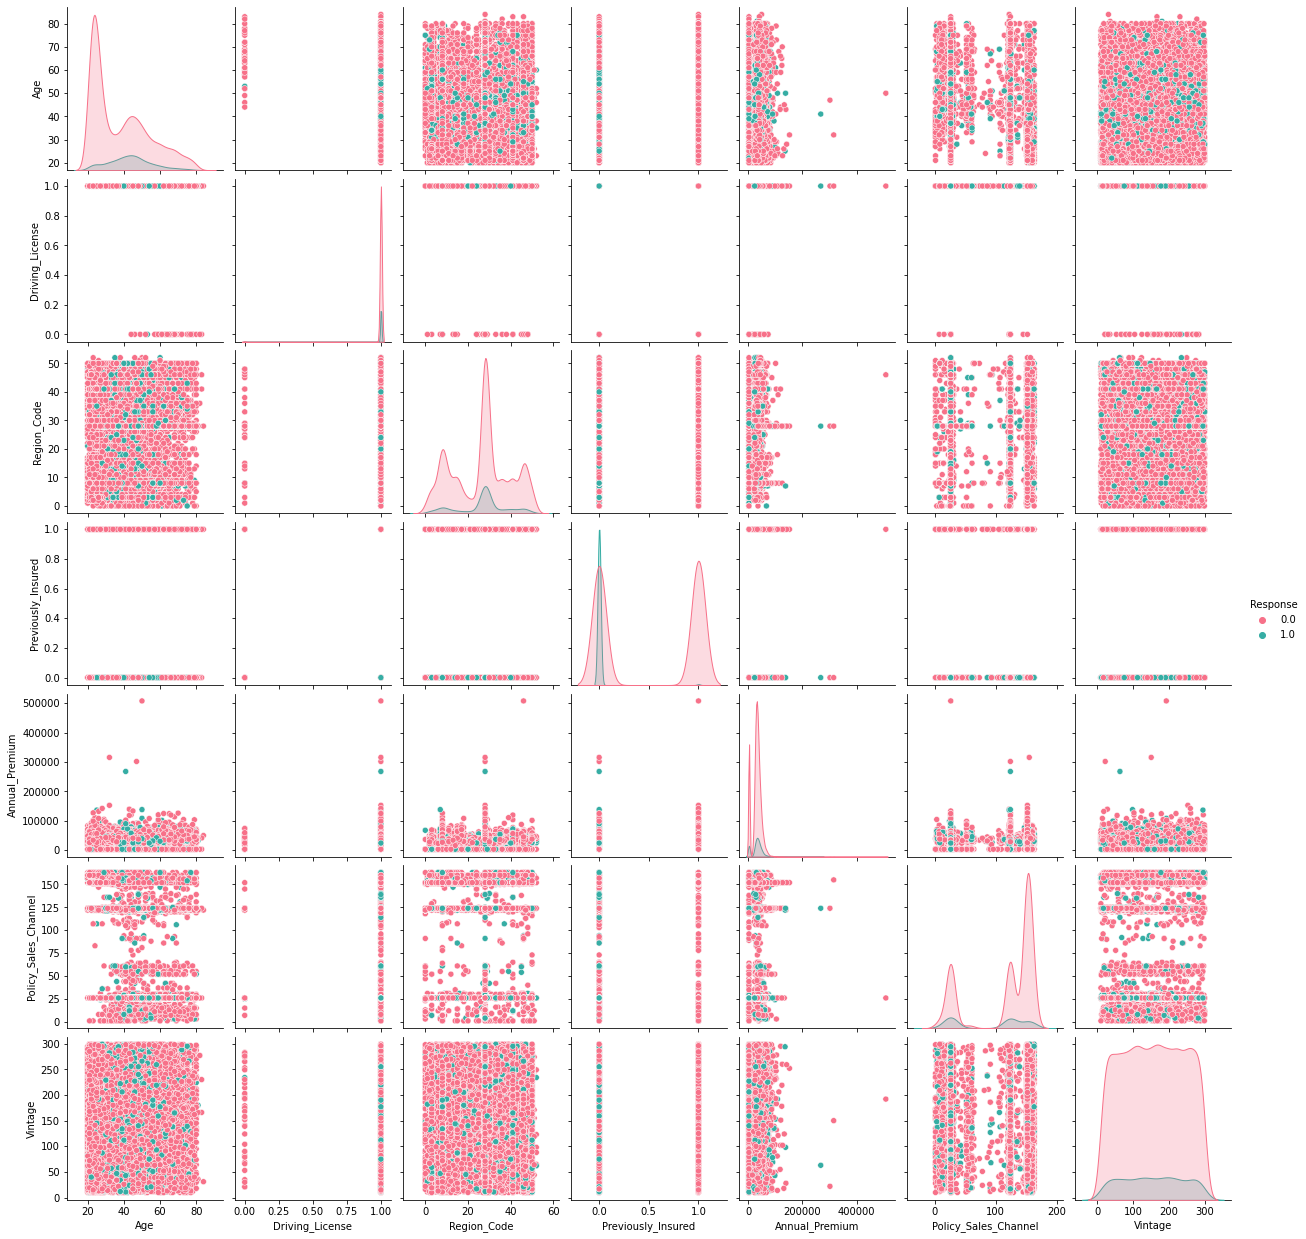

In [ ]:
# generate pairplot
sb.pairplot(train, hue="Response", palette="husl");